### Data Loading and Preprocessing Implementation

The CIFAR-10 dataset was accessed using the `keras.datasets` module, which provided a straightforward method to load the dataset.

In [18]:
# Upgrade pip
! pip install --upgrade pip

# Installing tensorflow 
! pip install tensorflow keras

pip install --upgrade keras

Import tensorflow and the data set

In [20]:
import tensorflow as tf
from keras.utils import to_categorical

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

2.18.0


In [21]:
# Normalize the images to [0,1] range
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Data augmentation was implemented using the ImageDataGenerator class from Keras, which applied transformations to the training images on the fly during training.

In [22]:
# from keras.preprocessing.image import ImageDataGenerator
from keras.src.legacy.preprocessing.image import ImageDataGenerator

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Compute any necessary statistics for normalization
datagen.fit(x_train)

## Model Construction

The CNN architecture was constructed using the Keras Sequential API, allowing for a clear and modular definition of the layers.



In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation

model = Sequential()

# Convolutional Block 1
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Block 2
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Block 3
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Block 4
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))


The architecture comprised four convolutional blocks, each consisting of a convolutional layer, batch normalization, ReLU activation, and max pooling. Following the convolutional layers, the model included two fully connected layers with dropout regularization to mitigate overfitting.

# Training Procedure Implementation

The model was compiled with the Adam optimizer and categorical cross-entropy loss function, appropriate for multi-class classification tasks.

In [25]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Training was conducted over 50 epochs with a batch size of 64. The fit method was used to train the model, incorporating the data augmentation generator.

In [26]:
# Training the model with data augmentation
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=50,
                    validation_data=(x_test, y_test),
                    steps_per_epoch=x_train.shape[0] // 64)

Epoch 1/50


/opt/homebrew/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.2347 - loss: 2.0968 - val_accuracy: 0.2328 - val_loss: 2.0697
Epoch 2/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.3281 - loss: 1.7547

2024-10-31 03:02:07.162762: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/homebrew/anaconda3/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3281 - loss: 1.7547 - val_accuracy: 0.2203 - val_loss: 2.1730
Epoch 3/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.3973 - loss: 1.5975 - val_accuracy: 0.3874 - val_loss: 1.6241
Epoch 4/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.4531 - loss: 1.5871

2024-10-31 03:02:35.049398: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4531 - loss: 1.5871 - val_accuracy: 0.4180 - val_loss: 1.5420
Epoch 5/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.4797 - loss: 1.4177 - val_accuracy: 0.5352 - val_loss: 1.3969
Epoch 6/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5469 - loss: 1.3157 - val_accuracy: 0.5255 - val_loss: 1.3785
Epoch 7/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.5296 - loss: 1.3169 - val_accuracy: 0.5422 - val_loss: 1.2603
Epoch 8/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.5312 - loss: 1.1329

2024-10-31 03:03:33.137154: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5312 - loss: 1.1329 - val_accuracy: 0.5379 - val_loss: 1.2756
Epoch 9/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.5653 - loss: 1.2273 - val_accuracy: 0.5748 - val_loss: 1.1824
Epoch 10/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6562 - loss: 1.0189 - val_accuracy: 0.5732 - val_loss: 1.1880
Epoch 11/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.5886 - loss: 1.1636 - val_accuracy: 0.5866 - val_loss: 1.1748
Epoch 12/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5469 - loss: 1.1572 - val_accuracy: 0.6021 - val_loss: 1.1245
Epoch 13/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.6049 - loss: 1.1241 - val_accuracy: 0.5298 - val_loss: 1.4926
Epoch 14/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7031 - loss: 1.0158 - val_accuracy: 0.5352 - val_loss: 1.4610
Epoch 15/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.6275 - loss: 1.0564 - val_accuracy:

2024-10-31 03:05:28.556663: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5781 - loss: 1.0326 - val_accuracy: 0.6936 - val_loss: 0.9082
Epoch 17/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.6429 - loss: 1.0231 - val_accuracy: 0.6857 - val_loss: 0.9389
Epoch 18/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7344 - loss: 0.8840 - val_accuracy: 0.6757 - val_loss: 0.9572
Epoch 19/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.6527 - loss: 0.9899 - val_accuracy: 0.6914 - val_loss: 0.8743
Epoch 20/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6250 - loss: 1.0957 - val_accuracy: 0.6948 - val_loss: 0.8711
Epoch 21/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.6708 - loss: 0.9597 - val_accuracy: 0.6702 - val_loss: 0.9586
Epoch 22/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6719 - loss: 0.9347 - val_accuracy: 0.6697 - val_loss: 0.9603
Epoch 23/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.6772 - loss: 0.9269 - val_accuracy

2024-10-31 03:09:24.549292: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7812 - loss: 0.7098 - val_accuracy: 0.7039 - val_loss: 0.8023
Epoch 33/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.7409 - loss: 0.7769 - val_accuracy: 0.7187 - val_loss: 0.8061
Epoch 34/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7031 - loss: 0.8002 - val_accuracy: 0.7165 - val_loss: 0.8112
Epoch 35/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7519 - loss: 0.7567 - val_accuracy: 0.6765 - val_loss: 0.9435
Epoch 36/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6406 - loss: 0.8168 - val_accuracy: 0.6784 - val_loss: 0.9332
Epoch 37/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7619 - loss: 0.7313 - val_accuracy: 0.7485 - val_loss: 0.7232
Epoch 38/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7500 - loss: 0.6607 - val_accuracy: 0.7593 - val_loss: 0.7014
Epoch 39/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.7687 - loss: 0.7037 - val_accuracy

Early stopping and model checkpointing were implemented using callbacks to prevent overfitting and save the best model based on validation accuracy.

In [28]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy',
                                   save_best_only=True, verbose=1)

# Include callbacks in the training process
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=50,
                    validation_data=(x_test, y_test),
                    steps_per_epoch=x_train.shape[0] // 64,
                    callbacks=[early_stop, model_checkpoint])

Epoch 1/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 55s 71ms/step - accuracy: 0.7344 - loss: 0.6833

/opt/homebrew/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8023 - loss: 0.6103
Epoch 1: val_accuracy improved from -inf to 0.73690, saving model to best_model.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.8024 - loss: 0.6103 - val_accuracy: 0.7369 - val_loss: 0.8089
Epoch 2/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.7969 - loss: 0.5900
Epoch 2: val_accuracy did not improve from 0.73690
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7969 - loss: 0.5900 - val_accuracy: 0.7357 - val_loss: 0.8159
Epoch 3/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8094 - loss: 0.5930
Epoch 3: val_accuracy improved from 0.73690 to 0.74070, saving model to best_model.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.8094 - loss: 0.5930 - val_accuracy: 0.7407 - val_loss: 0.8066
Epoch 4/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.8594 - loss: 0.4574
Epoch 4: val_accuracy did not improve from 0.74070
781/781 ━━━━━━━━━━━━━━━━━━━━ 

2024-10-31 03:24:38.660167: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 14: val_accuracy did not improve from 0.81810
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7969 - loss: 0.6116 - val_accuracy: 0.8166 - val_loss: 0.5507
Epoch 15/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8294 - loss: 0.5265
Epoch 15: val_accuracy did not improve from 0.81810
781/781 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.8294 - loss: 0.5265 - val_accuracy: 0.8009 - val_loss: 0.5884
Epoch 16/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.9062 - loss: 0.5838
Epoch 16: val_accuracy did not improve from 0.81810
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9062 - loss: 0.5838 - val_accuracy: 0.8001 - val_loss: 0.5911
Epoch 17/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8331 - loss: 0.5176
Epoch 17: val_accuracy did not improve from 0.81810
781/781 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.8331 - loss: 0.5176 - val_accuracy: 0.7822 - val_loss: 0.6853
Epoch 18/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step

### Hyperparameter Tuning Implementation

Hyperparameters were tuned through experimentation, adjusting one parameter at a time while monitoring validation performance.

- Learning Rate: Adjusted via the optimizer; default learning rate of 0.001 for Adam was found to be effective.
- Batch Size: Tested values of 32, 64, and 128; batch size of 64 provided a balance between computational efficiency and model convergence.
- Dropout Rate: Evaluated dropout rates of 0.25 and 0.5; a rate of 0.5 yielded better generalization on the validation set.

## Testing and Evaluation

After training, the best model was loaded for evaluation on the test set.

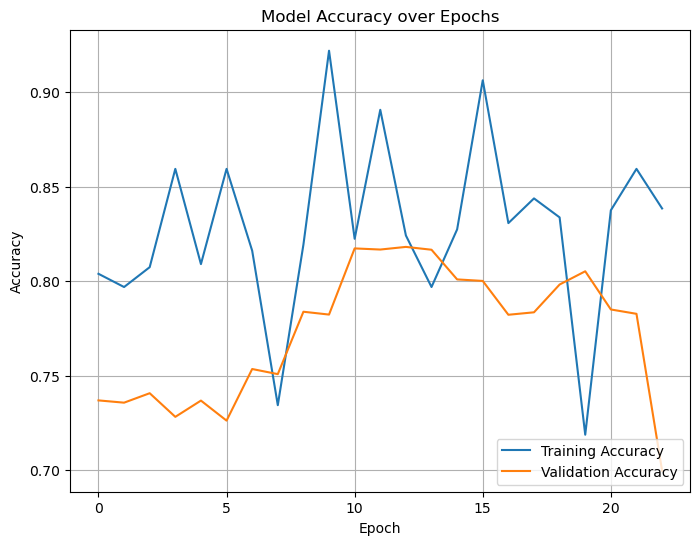

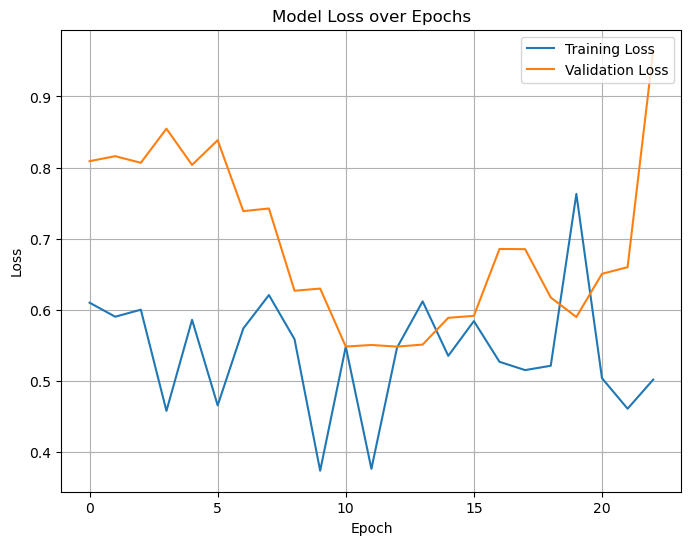

In [44]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [29]:
# Load the best saved model
from keras.models import load_model

best_model = load_model('best_model.keras')

# Evaluate the model on the test data
test_loss, test_accuracy = best_model.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Test Accuracy: 81.81%


A confusion matrix and classification report were generated to provide detailed insights into the model's performance across different classes.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


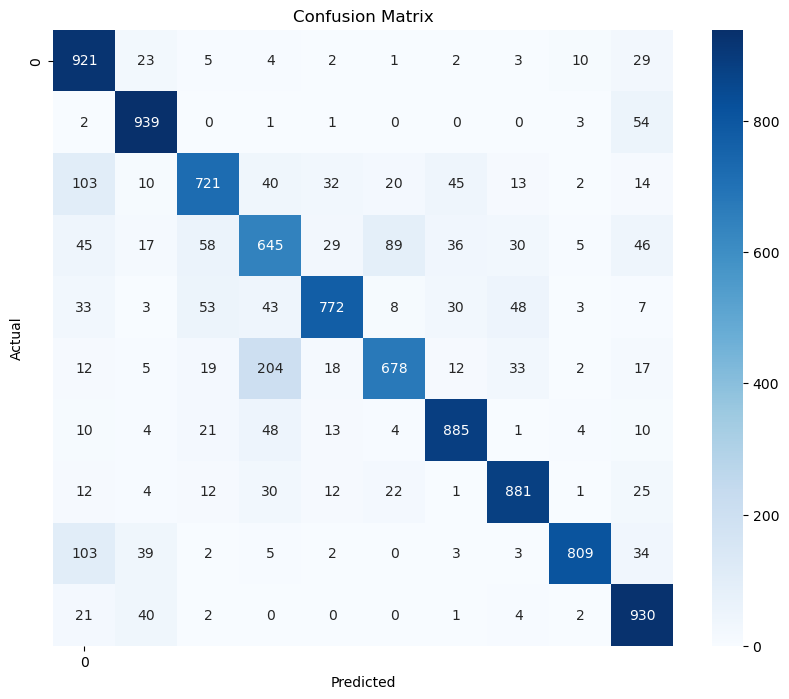

              precision    recall  f1-score   support

   airplanes       0.73      0.92      0.81      1000
 automobiles       0.87      0.94      0.90      1000
       birds       0.81      0.72      0.76      1000
        cats       0.63      0.65      0.64      1000
        deer       0.88      0.77      0.82      1000
        dogs       0.82      0.68      0.74      1000
       frogs       0.87      0.89      0.88      1000
      horses       0.87      0.88      0.87      1000
       ships       0.96      0.81      0.88      1000
      trucks       0.80      0.93      0.86      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



In [47]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict classes on the test set
y_pred = best_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
class_names = 10
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_true_classes, y_pred_classes, target_names=['airplanes', 'automobiles', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks']))

In [48]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the true labels
# If y_test is in one-hot encoded format, skip this step
y_test_classes = np.argmax(y_test, axis=1)
y_test_binarized = label_binarize(y_test_classes, classes=range(10))

# Predicted probabilities from the model
y_pred_prob = model.predict(x_test)

# Number of classes
num_classes = y_test_binarized.shape[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [52]:
# Dictionary to store ROC curves and AUC values for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
class_names = ['airplanes', 'automobiles', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks']

for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

### Plotting the ROC Curves

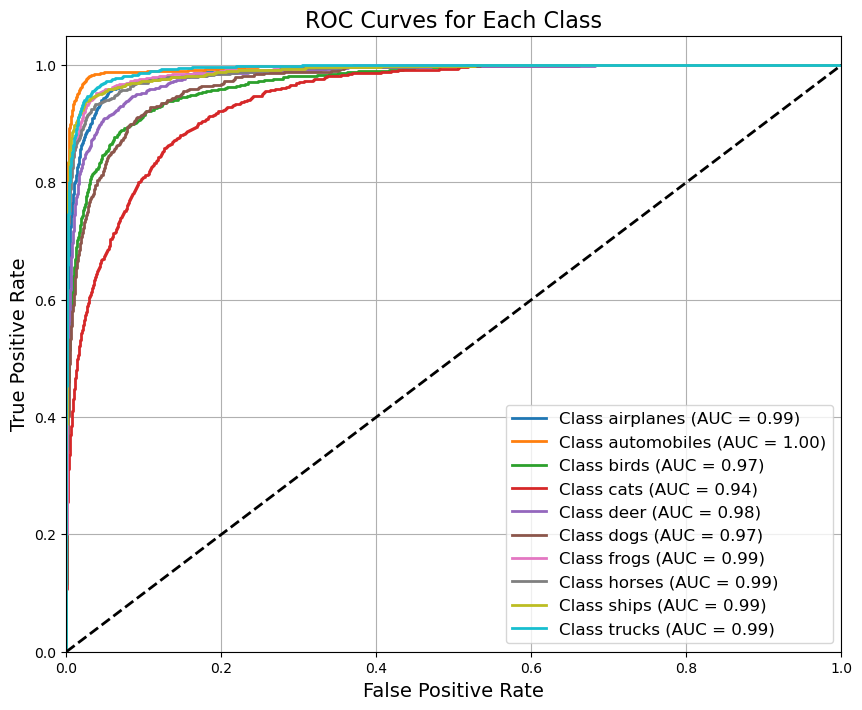

In [53]:
# Plotting all ROC curves on a single figure
plt.figure(figsize=(10, 8))

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='Class {0} (AUC = {1:0.2f})'
                                         ''.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves for Each Class', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()

### Compute Micro-Average ROC Curve and AUC

In [54]:
# Compute micro-average ROC curve and ROC area
from sklearn.metrics import roc_auc_score

# Flatten the true labels and predicted probabilities
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= num_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

### Plotting Micro-Average and Macro-Average ROC Curves

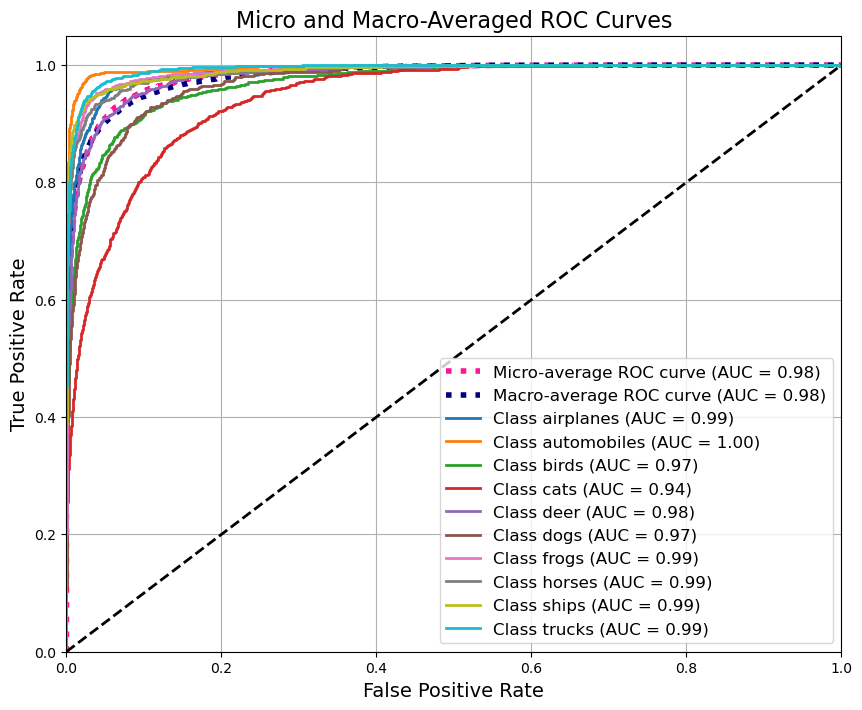

In [55]:
# Plotting micro-average and macro-average ROC curves
plt.figure(figsize=(10, 8))

plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (AUC = {0:0.2f})'.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (AUC = {0:0.2f})'.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

# Plot ROC curves for each class
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='Class {0} (AUC = {1:0.2f})'
                                         ''.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Micro and Macro-Averaged ROC Curves', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()

An error analysis was conducted by examining misclassified examples to identify common patterns and potential areas for improvement.

First, use the trained model to predict the class probabilities for the test images.

In [56]:
# Predict class probabilities for the test set
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred_prob, axis=1)

# True class labels
y_true_classes = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


Identify Misclassified Instances

Compare the predicted class labels with the true labels to find misclassified samples.

In [57]:
# Identify indices of misclassified samples
misclassified_indices = np.where(y_pred_classes != y_true_classes)[0]

# Total number of misclassifications
num_misclassified = len(misclassified_indices)
print(f'Total misclassified images: {num_misclassified}')

Total misclassified images: 1819


Select a Subset of Misclassified Images

For visualization purposes, select a subset of misclassified images. It's common to display 25 or so images in a grid for clarity.

In [59]:
num_display = 25

# Ensure we do not exceed the number of misclassified samples
num_display = min(num_display, num_misclassified)

# Randomly select indices if there are more misclassified images than desired
selected_indices = np.random.choice(misclassified_indices, size=num_display, replace=False)

Visualize and Annotate the Images
Use matplotlib to create a grid of images, annotating each one with its true label and predicted label.

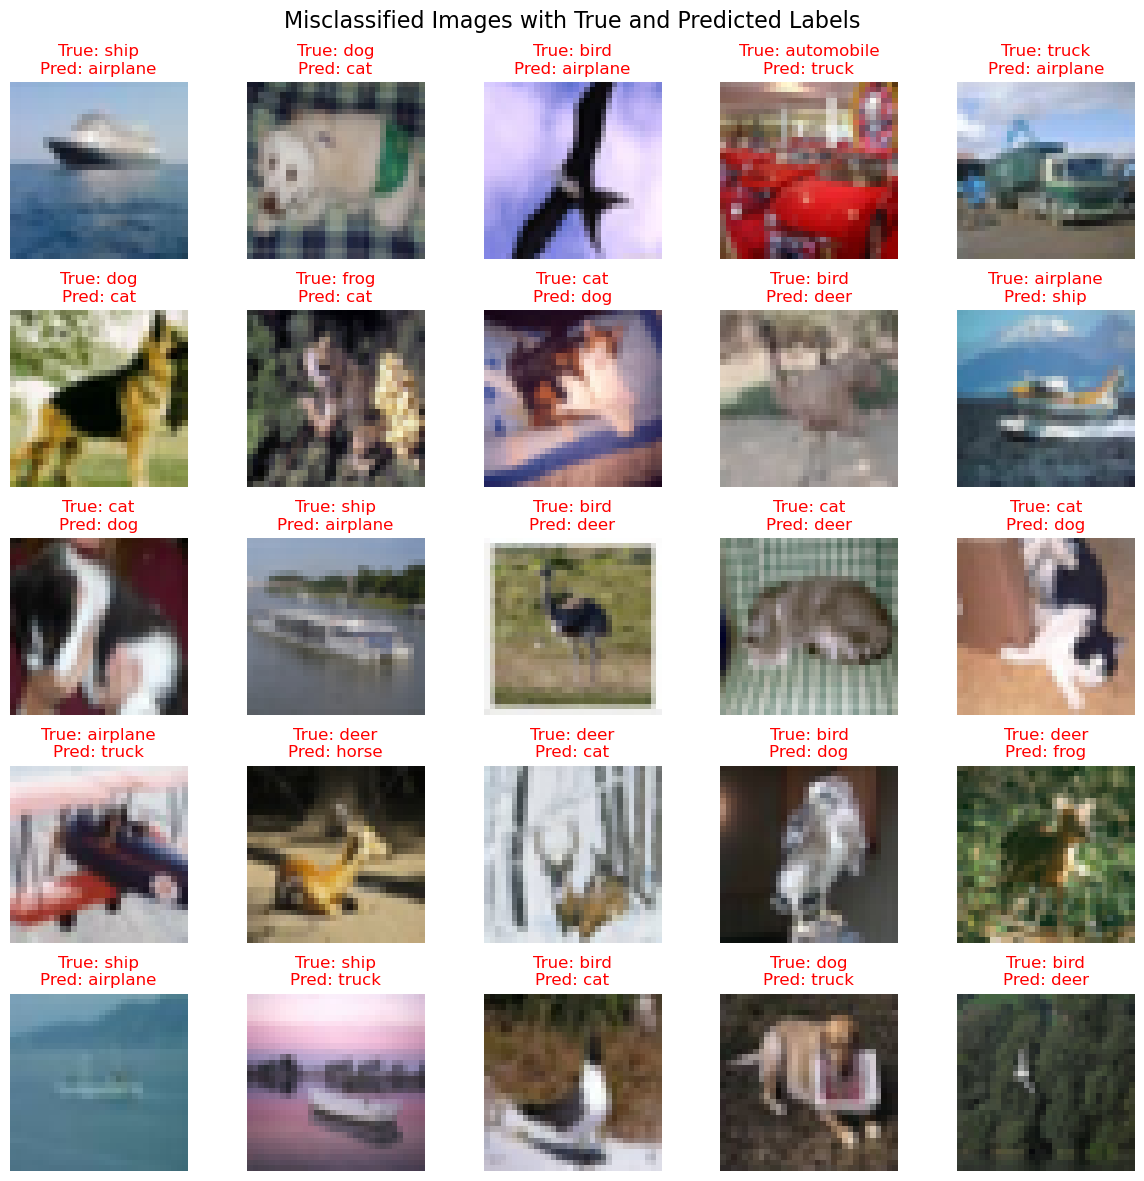

In [60]:
import seaborn as sns

# Define class names if not already defined
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Set up the figure with subplots
fig, axes = plt.subplots(5, 5, figsize=(12, 12))
axes = axes.flatten()

for idx, ax in zip(selected_indices, axes):
    # Get the image and labels
    image = x_test[idx]
    true_label = y_true_classes[idx]
    predicted_label = y_pred_classes[idx]
    
    # De-normalize the image if necessary (assuming images were normalized between 0 and 1)
    # image = image * 255.0
    # image = image.astype('uint8')
    
    # Convert image from (32, 32, 3) to (32, 32, 3) if necessary
    # If using channels first format, transpose the axes
    # image = np.transpose(image, (1, 2, 0))
    
    # Display the image
    ax.imshow(image)
    ax.axis('off')
    
    # Set the title with true and predicted labels
    ax.set_title(f"True: {class_names[true_label]}\nPred: {class_names[predicted_label]}", 
                 color='red' if true_label != predicted_label else 'green',
                 fontsize=12)
    
# Adjust layout
plt.tight_layout()
plt.suptitle('Misclassified Images with True and Predicted Labels', fontsize=16)
plt.subplots_adjust(top=0.92)  # Adjust the top to make room for the suptitle
plt.show()

### Deployment

The trained model was deployed as a web application using Flask, enabling users to upload images and receive real-time classification results.

- Model Saving:

In [40]:
# Save the model in keras format
best_model.save('cifar10_cnn_model.keras')

- Deployment Platform:

A Flask application was developed to serve the model, handling HTTP requests and rendering HTML templates for user interaction.

- Serving the Model:

In [42]:
from flask import Flask, request, render_template
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np
import io

app = Flask(__name__)
model = load_model('cifar10_cnn_model.keras')
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

def prepare_image(image, target_size=(32, 32)):
    if image.mode != 'RGB':
        image = image.convert('RGB')
    image = image.resize(target_size)
    image_array = img_to_array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)
    return image_array

@app.route('/', methods=['GET', 'POST'])
def predict():
    if request.method == 'POST':
        if 'file' not in request.files:
            return 'No file uploaded.'
        file = request.files['file']
        if file.filename == '':
            return 'No file selected.'
        image = Image.open(io.BytesIO(file.read()))
        image_array = prepare_image(image)
        prediction = model.predict(image_array)
        predicted_class = class_names[np.argmax(prediction)]
        return render_template('result.html', prediction=predicted_class)
    return render_template('index.html')

/opt/homebrew/anaconda3/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 24 variables whereas the saved optimizer has 46 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


The web application included HTML templates for the main page (`index.html`) and result display (`result.html`), allowing for a user-friendly interface.

# Code Organization and Version Control

The project was structured into the following modules:

- data_preprocessing.py: Contained functions for loading and preprocessing the data.
- model.py: Defined the CNN architecture.
- train.py: Included the training script and hyperparameter tuning.
- evaluate.py: Contained code for model evaluation and metrics calculation.
- app.py: Held the Flask application code for deployment.
- utils.py: Included utility functions for plotting and other common tasks.

Version control was managed using Git, with the repository hosted on GitHub ([repository link]). The codebase included a .gitignore file to exclude unnecessary files and a README.md providing instructions for replication.

# Reproducibility and Documentation

Random Seed Setting:
To ensure reproducibility, random seeds were set for NumPy and TensorFlow.



In [43]:
import numpy as np
import tensorflow as tf
import random

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Documentation:
Comprehensive inline comments were included in the code, and a README.md file provided detailed instructions on setting up the environment, training the model, and running the web application. Additional documentation was provided in the form of Jupyter Notebooks demonstrating the model's performance and visualizations.

# Challenges Encountered and Solutions

Several challenges were encountered during implementation:

Compatibility Issues:
Initially, there were compatibility issues between TensorFlow and Keras versions. This was resolved by ensuring that the versions of TensorFlow and Keras were compatible, ultimately using TensorFlow's integrated Keras API.

# Overfitting:
The model showed signs of overfitting during early training stages. Implementing data augmentation, increasing dropout rates, and using early stopping mitigated this issue.

# Deployment Difficulties:
Integrating the model with the Flask application required careful handling of input data formats and preprocessing steps to ensure consistency between training and inference.